## Importing neccesary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

## Checking the dataset

In [2]:
df = pd.read_csv('day (1).csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#checking the shape of df
df.shape

(730, 16)

In [5]:
#checking the columns of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### we can see that there are no missing values thats needs  to be imputed. 

In [7]:
#check the ata types of the columns in df
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
#checking the summary of numerical variables
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


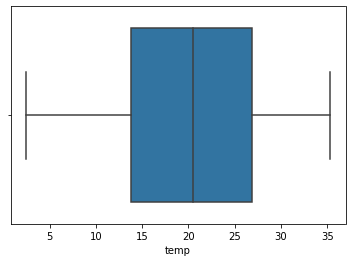

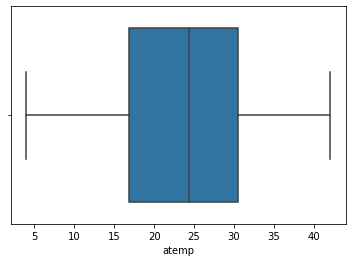

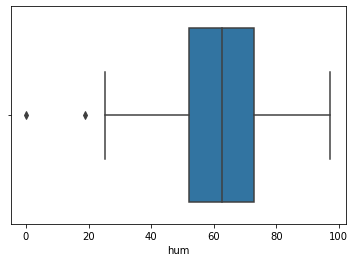

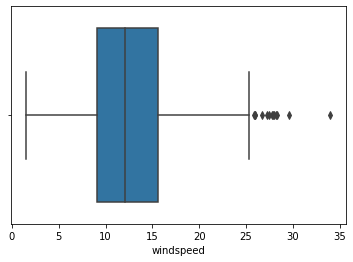

In [9]:
#Checking for any outliers in continuous columns
l = ['temp','atemp','hum','windspeed']

for i in l:
    sns.boxplot(df[i])
    plt.show()

In [10]:
### It seems there is no need to handle any outliers from the dataset.

# cleaning the data

### Droping the columns that are not useful for model

In [11]:
#Droping instant column as it is just a record index and is not required for analysis purposes
df.drop('instant',axis = 1,inplace = True)

In [12]:
#We can also drop dteday as it seems uneccesary for analysis as we are not going for day to day trend
df.drop('dteday',axis=1,inplace=True)

In [13]:
#As we know cnt = casual + registered and also our target variable is cnt so we can drop these two columns as well
df.drop(['casual','registered'],axis = 1,inplace = True)

In [14]:
#Now checking few data points after droping
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
#maping the numerical variables in season column
df.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'},inplace=True)

In [16]:
#maping the month column with there respective months
df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace=True)

In [17]:
#Maping weathersit column
df.weathersit.replace({1:"clear",2:'mist',3:'light snow',4:'heavy rain'},inplace=True)

In [18]:
#maping weekday colum aswell
df.weekday.replace({1:'monday',2:'tuesday',3:'wednesday',4:'thursday',5:'friday',6:'saturday',0:'sunday'},inplace=True)

### Visualising the dataset

<Figure size 1296x720 with 0 Axes>

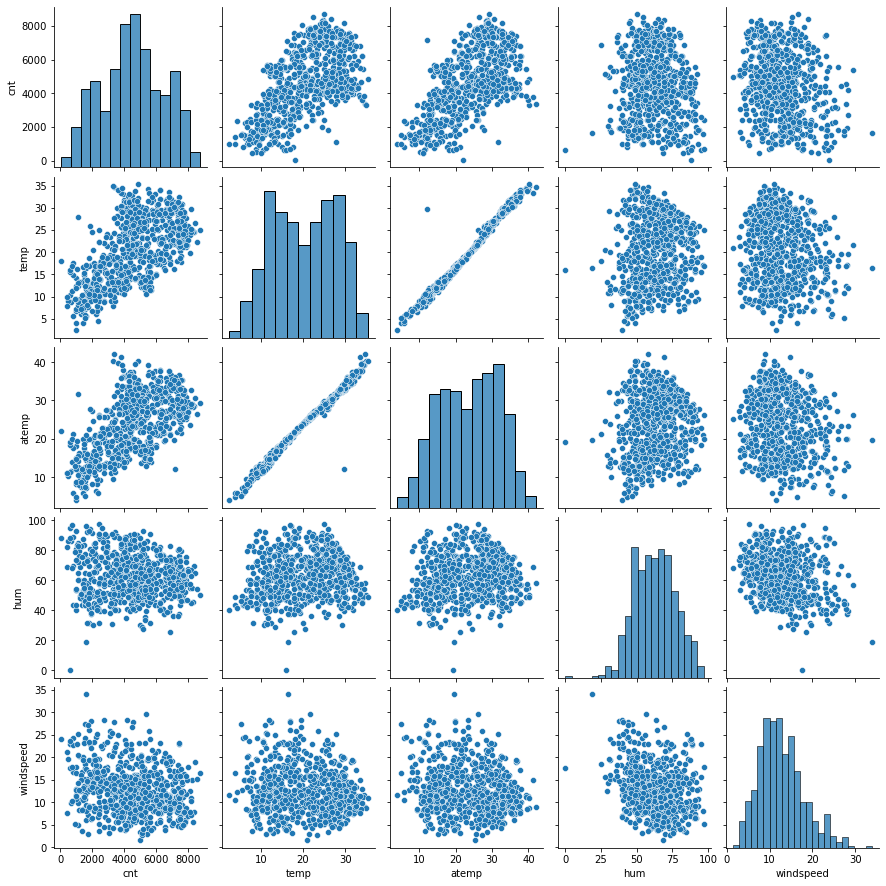

In [19]:
##visualising the colums with respect to our target variable

plt.figure(figsize=[18,10])
sns.pairplot(data = df,vars = ['cnt','temp','atemp','hum','windspeed'])
plt.show()

#### * We can see that temp and atemp is highly correlated with cnt.
#### * also temp and atemp is higly correlating with each other.

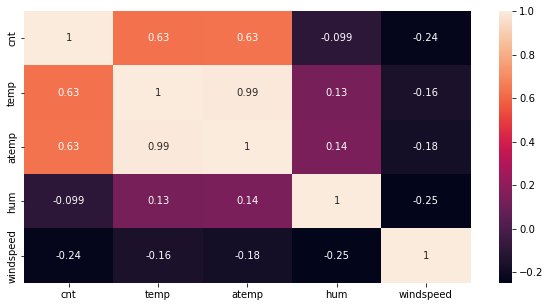

In [20]:
#We can also visualize with a heat map for continuous columns 
plt.figure(figsize = [10,5])
sns.heatmap(df[['cnt','temp','atemp','hum','windspeed']].corr(),annot=True)
plt.show()

### * highest degree of correlation is between atemp and temp of 0.99

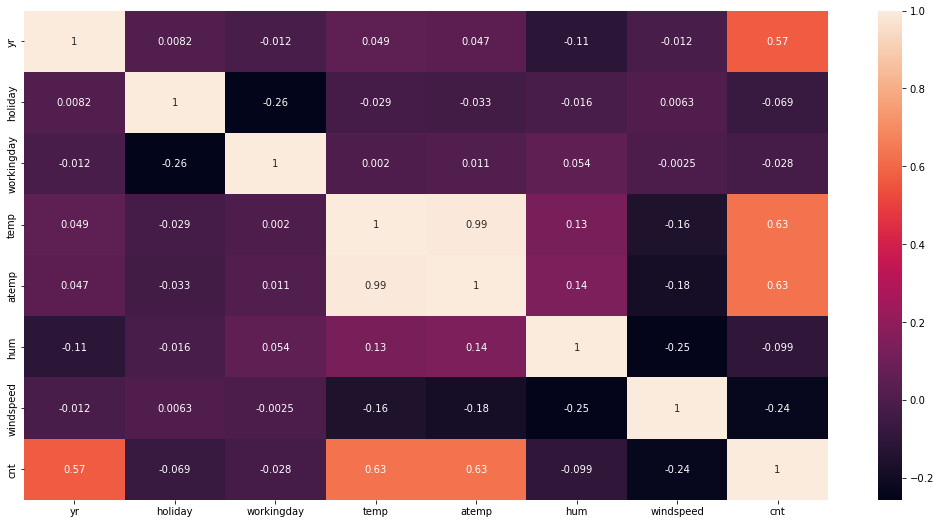

In [21]:
#Now we can check correlation of every variable in the dataset
plt.figure(figsize = [18,9])
sns.heatmap(df.corr(),annot=True)
plt.show()

#### * As we already know atemp and temp is higly correlated with our target varible(cnt) 
####          so we will have to drop one of those to avoid multicolinearrity.
#### We can drop one of those by checking VIF and p-value respectively later in the model.

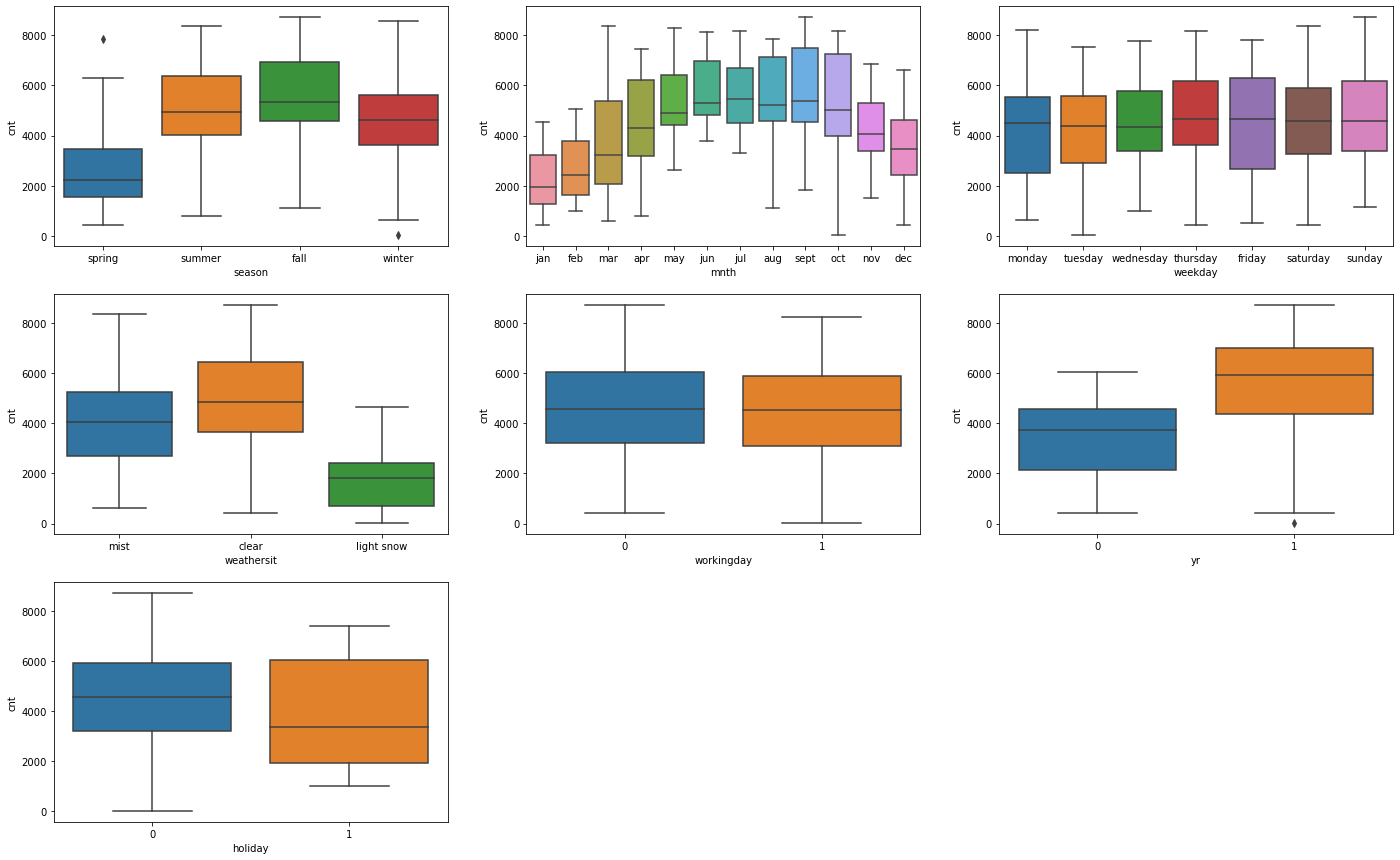

In [22]:
#Analysing categorical variables with respect to target variable using boxplot
plt.figure(figsize=[24,15])
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt',data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y='cnt',data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt',data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'yr', y ='cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.show()

### Summary:-

#### 1. Fall season is peak sesaon for the business having highest demand for rental bikes.
#### 2. Month of september has highest demand for rental bikes. As the year starts demands is rising until it hits oct
####   this may happen due to nearing winter nad increase in cold
#### 3. Weekday doesn't show any sort of demand pattern clearly
#### 4. During clear weather we can see increase in the demand of rental service.
#### 5. Working day also does not show any sort of pattern
#### 6. 2019 is the year where demand of rental services increased drastically.
#### 7. When there is a holiday the demand has decreased.

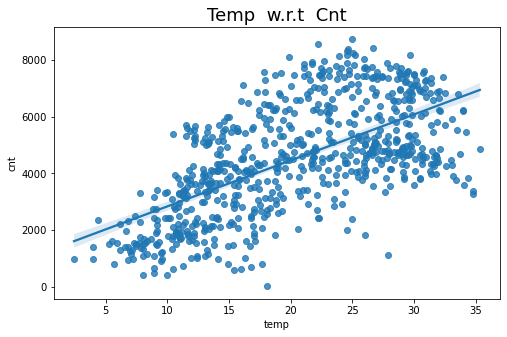

In [23]:
#ploting using a regplot for continuous variable
plt.figure(figsize=[8,5])
plt.title('Temp  w.r.t  Cnt',fontsize=18)
sns.regplot(data = df, x ='temp', y ='cnt')
plt.show()

#### As temp is increasing we can see our target variable also increasing showing +ve correlation and linear relationship as well.

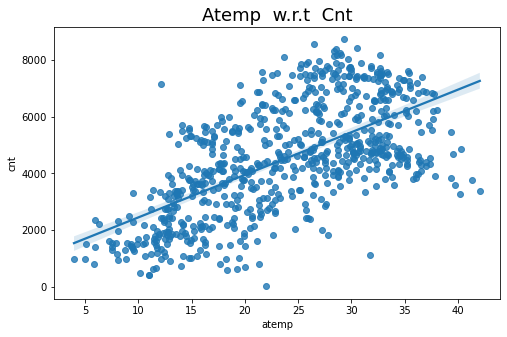

In [24]:
plt.figure(figsize=[8,5])
plt.title('Atemp  w.r.t  Cnt',fontsize=18)
sns.regplot(data = df, x ='atemp', y ='cnt')
plt.show()

#### Atemp has same behaviour as that of temp since both(temp and atemp) is highly correlated with each other.

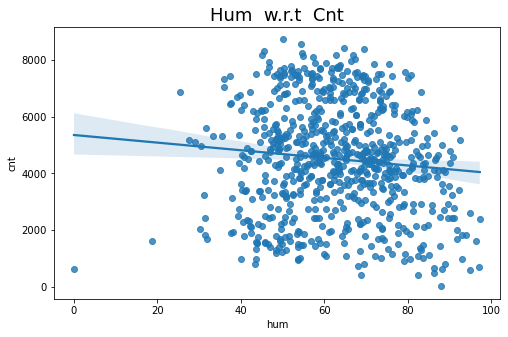

In [25]:
plt.figure(figsize=[8,5])
plt.title('Hum  w.r.t  Cnt',fontsize=18)
sns.regplot(data = df, x ='hum', y ='cnt')
plt.show()

#### We cant see any proper pattern as it is scattered but slight decrease can be seen to our target variable as humidity increases. Showing sign of inverse relation. 

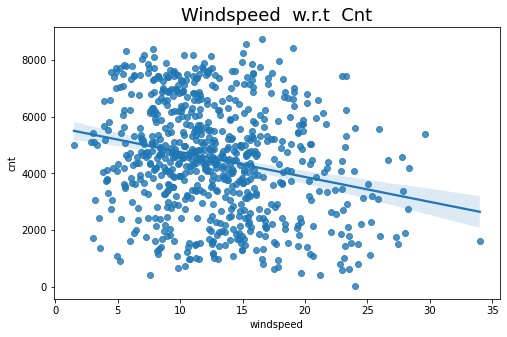

In [26]:
plt.figure(figsize=[8,5])
plt.title('Windspeed  w.r.t  Cnt',fontsize=18)
sns.regplot(data = df, x ='windspeed', y ='cnt')
plt.show()

#### Windspped values are also scattered and shows similar relationship where cnt is deacreasing with an increase of windspeed

## Data preparation

In [27]:
#Now we will create dummy variable for our categorical columns
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [28]:
season = pd.get_dummies(df.season,drop_first=True)
month = pd.get_dummies(df.mnth,drop_first=True)
weekday = pd.get_dummies(df.weekday,drop_first=True)
weathersit = pd.get_dummies(df.weathersit,drop_first=True)

In [29]:
#Now we will concat all the ummies to our dataset df

new_df = pd.concat([df,season,month,weekday,weathersit],axis=1)

In [30]:
new_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,light snow,mist
0,spring,0,jan,0,monday,1,mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,tuesday,1,mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,wednesday,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thursday,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,friday,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#Since dummies has been created so we can drop the main columns

new_df.drop('season',axis=1,inplace=True)
new_df.drop('mnth',axis=1,inplace=True)
new_df.drop('weekday',axis=1,inplace=True)
new_df.drop('weathersit',axis=1,inplace=True)

In [32]:
#Checking the dataset again
new_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,light snow,mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
new_df.shape

(730, 30)

### Spliting the datset into train and test sets

In [34]:
np.random.seed(0)
df_train, df_test = train_test_split(new_df, train_size = 0.7, random_state = 100)


In [35]:
df_train.shape

(510, 30)

In [36]:
df_test.shape

(220, 30)

### Rescaling the Features

In [37]:
scaler = MinMaxScaler()

In [38]:
#Aplying scaler to all the columns except dummy variables columns
numericals = ['cnt','temp','atemp','hum','windspeed']
df_train[numericals] = scaler.fit_transform(df_train[numericals])

In [39]:
#Checking the atset after rescaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,light snow,mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


In [40]:
#Usng describe function to vrify rescaling
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,light snow,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Building a linear model

#### Dividing the dataset into X and y for model building

In [41]:
y_train = df_train.pop('cnt')
X_train = df_train

In [42]:
#using RFE

lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,n_features_to_select = 15)
rfe = rfe.fit(X_train,y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sept', True, 1),
 ('monday', False, 8),
 ('saturday', False, 5),
 ('sunday', False, 6),
 ('thursday', False, 14),
 ('tuesday', False, 7),
 ('wednesday', False, 11),
 ('light snow', True, 1),
 ('mist', True, 1)]

In [44]:
#Selected variables
columns = X_train.columns[rfe.support_]
columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'jul', 'nov', 'sept', 'light snow', 'mist'],
      dtype='object')

In [45]:
#Rejected varaibles
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'jun', 'mar', 'may', 'oct',
       'monday', 'saturday', 'sunday', 'thursday', 'tuesday', 'wednesday'],
      dtype='object')

### Building a model using statsmodel

In [46]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[columns]

#### First model

In [47]:
#adding constant for our 1st model
X_train_lm = sm.add_constant(X_train_rfe)

In [48]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [49]:
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          8.15e-189
Time:                        20:02:49   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.0

In [50]:
#As the p-values show all variables are somewhat significant so now we will check VIF of the variables


In [51]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [52]:
calculateVIF(X_train_rfe)

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
14,mist,2.32
0,yr,2.09
11,nov,1.85
9,jan,1.75


In [53]:
#Humidity is showing a very high VIF so we will drop that column now
X_train_new = X_train_rfe.drop('hum',axis=1)

In [54]:
#VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,yr,2.07
10,nov,1.81
8,jan,1.66
9,jul,1.59
13,mist,1.57


#### VIF seems to be good but lets try to further decrease it.


## 2nd Model

In [55]:
X_train_lm2 = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train,X_train_lm2).fit()

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          4.75e-186
Time:                        20:02:49   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2450      0.032      7.618      0.0

In [56]:
#Droping nov as it has p-value nearing to insignificant statistically.
X_train_new = X_train_new.drop('nov',axis=1)

In [57]:
#Updated VIF
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
4,spring,2.89
5,summer,2.24
0,yr,2.07
6,winter,2.05
8,jan,1.65
9,jul,1.59
12,mist,1.57
10,sept,1.34


#### VIF did not change drastically we will try to reduce it in our next model.

### 3rd Model

In [58]:
X_train_lm3 = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train,X_train_lm3).fit()

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          2.74e-186
Time:                        20:02:50   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2283      0.031      7.310      0.0

In [59]:
##Droping dec as it has high p-value
X_train_new= X_train_new.drop('dec',axis=1)

In [60]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
4,spring,2.75
5,summer,2.24
0,yr,2.07
6,winter,1.78
7,jan,1.61
8,jul,1.59
11,mist,1.56
9,sept,1.34


### 4th Model

In [61]:
X_train_lm4 = sm.add_constant(X_train_new)
lm4 = sm.OLS(y_train,X_train_lm4).fit()

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          8.14e-187
Time:                        20:02:50   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2154      0.030      7.088      0.0

In [62]:
#Droping jan as it has high p-value
X_train_new = X_train_new.drop('jan',axis=1)

In [63]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,yr,2.07
6,winter,1.78
7,jul,1.58
10,mist,1.55
8,sept,1.34
9,light snow,1.08


#### VIF seems to be improving now.

#### Note:-
#### Even temp VIF is exceeding 5 it seems to be an important variable so we are keeping it and maintaining the p-value of variables to as minimum as possible to improve the VIF. 

## 5th Model

In [64]:
X_train_lm5 = sm.add_constant(X_train_new)
lm5 = sm.OLS(y_train,X_train_lm5).fit()

print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          5.06e-187
Time:                        20:02:50   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1994      0.030      6.746      0.0

In [65]:
#Now we will drop jul column as it has high p-value
X_train_new = X_train_new.drop('jul',axis=1)

In [66]:
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
9,mist,1.55
7,sept,1.23
8,light snow,1.08
1,holiday,1.04


#### Finally we have VIF of less than 5 for all the variables which is a pretty good sign for our model.

## 6th Model

In [67]:
X_train_lm6 = sm.add_constant(X_train_new)
lm6 = sm.OLS(y_train,X_train_lm6).fit()

print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          1.47e-186
Time:                        20:02:51   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1909      0.030      6.447      0.0

### As we can see that p-values of the variable show that every variables is pretty significant and p(f-statistic) is almost equal to 0 which shows that our model is statistically significant.

### Also low VIF shows low multicolinearity between variables.

In [68]:
#Parameter of our final model
lm6.params

const         0.190855
yr            0.234132
holiday      -0.096316
temp          0.477737
windspeed    -0.148098
spring       -0.055406
summer        0.062076
winter        0.094476
sept          0.090998
light snow   -0.285031
mist         -0.078741
dtype: float64

### lets predict using our model

In [69]:
y_train_pred = lm6.predict(X_train_lm6)

In [70]:
y_train_pred

576    0.775223
426    0.464371
728    0.388469
482    0.569433
111    0.282980
         ...   
578    0.810023
53     0.215752
350    0.261221
79     0.316747
520    0.641815
Length: 510, dtype: float64

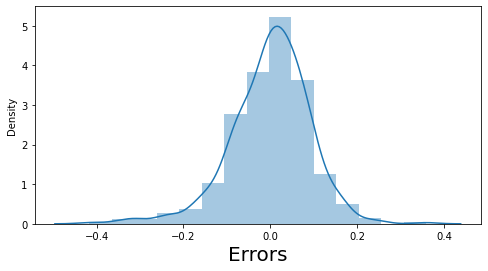

In [71]:
##Residual analysis of our train data
plt.figure(figsize=[8,4])
plt.xlabel("Errors",fontsize=20)
sns.distplot((y_train-y_train_pred), bins=15)
plt.show()

#### Normality of error terms distribution is satisfied.

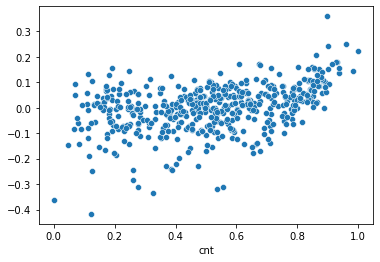

In [72]:
#Checking Homoscedasticity
res = y_train-y_train_pred
sns.scatterplot(y_train,res)
plt.show()

#### As there is no visible pattern is the plot we can safely say that the error term does not vary much as the value of the predictor variable changes. 

## Making prediction in our test set using our model

In [73]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,light snow,mist
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,1,0,0,0,0,0,0


In [74]:
#Scaling our test dataset
numericals

['cnt', 'temp', 'atemp', 'hum', 'windspeed']

In [75]:
df_test[numericals] = scaler.transform(df_test[numericals])

In [76]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,light snow,mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [77]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,light snow,mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Every column having max values as 1 or near to  show scaling has been completed

In [78]:
#Dividing the test dataset into X and y
y_test = df_test.pop('cnt')
X_test = df_test

In [79]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'sept', 'light snow', 'mist'],
      dtype='object')

In [80]:
imp_cols = X_train_new.columns

In [81]:
X_test = X_test[imp_cols]

In [82]:
#Adding a constant to our test dataset
X_test_lm6 = sm.add_constant(X_test)

In [83]:
y_test_pred = lm6.predict(X_test_lm6)

### Calculating R2 value for our test dataset. 

In [84]:
r2Value = r2_score(y_test,y_test_pred)
round(r2Value,3)

0.804

#### So our model is performing well in other data aswell as the r2 score is 0.804 which is preety good

In [85]:
#calculating adjuste r2
adjusted_r2 = round(1-(1-r2Value)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(round(adjusted_r2,3))

0.794


#### adjusted r2 also seems good enough for our final model.

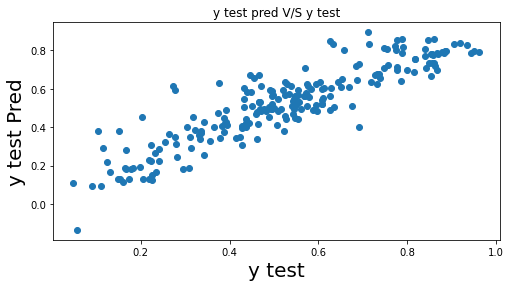

In [86]:
#Model Evaluation
plt.figure(figsize=[8,4])
plt.scatter(y_test,y_test_pred)
plt.title('y test pred V/S y test')
plt.xlabel('y test',fontsize=20)
plt.ylabel("y test Pred",fontsize=20)
plt.show()

#### Error terms are constant across prediction which is a good sign for our model.

#### train_df r2 : 0.833
#### train_df adj r2 : 0.829
#### test_df r2 : 0.804
#### test_df adj r2 : 0.794

#### Which sums up to be a good model for prediction of dependent variable(Y).

In [87]:
(round(lm6.params,3))

const         0.191
yr            0.234
holiday      -0.096
temp          0.478
windspeed    -0.148
spring       -0.055
summer        0.062
winter        0.094
sept          0.091
light snow   -0.285
mist         -0.079
dtype: float64

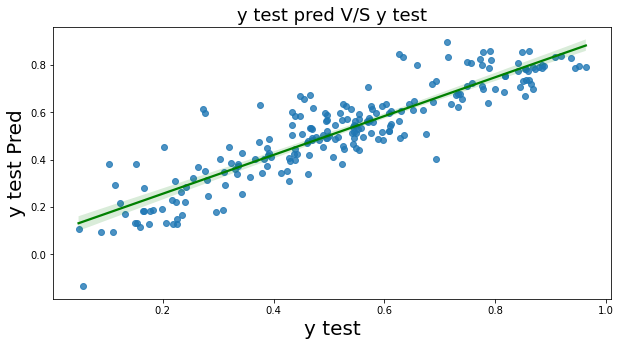

In [88]:
#Plot of best fit line on the test data.
plt.figure(figsize=[10,5])
sns.regplot(y_test,y_test_pred,line_kws={'color':'green'})
plt.title('y test pred V/S y test',fontsize=18)
plt.xlabel('y test',fontsize=20)
plt.ylabel("y test Pred",fontsize=20)
plt.show()

### Equation of our best fit line is :-

#### cnt = 0.191 + 0.234 x yr - 0.096 x holiday + 0.478 x temp - 0.148 x windspeed - 0.055 x spring + 0.062 x summer + 0.094 x winter + 0.091 x sept - 0.285 x light snow - 0.079 x mist

In [3]:
for i in range(5):
    print(i)

0
1
2
3
4


In [4]:
l = [2,4,6,8,10]

In [6]:
import matplotlib.pyplot as plt

In [11]:
n = int(input('write a no.: '))
if n%2==0:
    print('it is div b 2')
else:
    print('no')

write a no.: 13
no


In [58]:
import pandas as pd
import numpy as np

In [29]:
a = pd.Series([1,2,3,4,5,6,7])
b = pd.Series([1,3,7])

In [52]:
c = [i for i in b if i in a]
c

[1, 3]

In [61]:
ind = []

In [57]:
for i in a:
    if i in b:
        print(i)

1
2


In [55]:
ind

[1, 2]

In [38]:
a.index[2]

2

In [48]:
b

0    1
1    3
2    7
dtype: int64

In [51]:
del c

In [62]:
d = list(np.intersect1d(a,b))

In [64]:
for i in d:
    i

TypeError: 'RangeIndex' object is not callable

In [76]:
for i in a:
    if i in b:
        l = a.index.values.tolist()

In [82]:
[pd.Index(a).get_loc(i) for i in b]

[0, 2, 6]

In [83]:
df = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/8NMooe4G0ENEe8z9q5ZvaZA7/googleplaystore.csv')

In [84]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [88]:
df.Installs.replace(

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10841, dtype: object